# Analyzing COVID-19 Data in California

In [426]:
#import all libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## 1) Business Understanding

Currently living in San Francisco, I was wondering what is the safest county to be at when the lockdown will be eased. This is what pushed me to explore the dataset of COVID-19 by counties and try to answer these questions:

1. Is it safe to re-open California?
2. Which county should not re-open?
3. What are the counties that should ease their lockdown policy



## 2) Data Understanding

#### Gather Data

In [2]:
#dataset for the analysis
df = pd.read_csv('Downloads/us-counties.csv', index_col =0 )

In [429]:
df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0


#### Checking for missing values

In [428]:
df.describe()

,fips,cases,deaths
count,134025.000000,135570.000000,135570.000000
mean,29929.727730,253.072590,13.374847
std,15402.442915,2820.767159,255.194342
min,1001.000000,0.000000,0.000000
25%,18047.000000,3.000000,0.000000
50%,29029.000000,12.000000,0.000000
75%,45023.000000,56.000000,2.000000
max,56043.000000,190546.000000,19563.000000


In [4]:
df_group_by_state = df.groupby(by=['date','county']).sum()

In [430]:
df_group_by_state.head()

fips  cases  deaths
date       county                           
2020-01-21 Snohomish  53061.0      1       0
2020-01-22 Snohomish  53061.0      1       0
2020-01-23 Snohomish  53061.0      1       0
2020-01-24 Cook       17031.0      1       0
           Snohomish  53061.0      1       0

## 3) Data Preparation

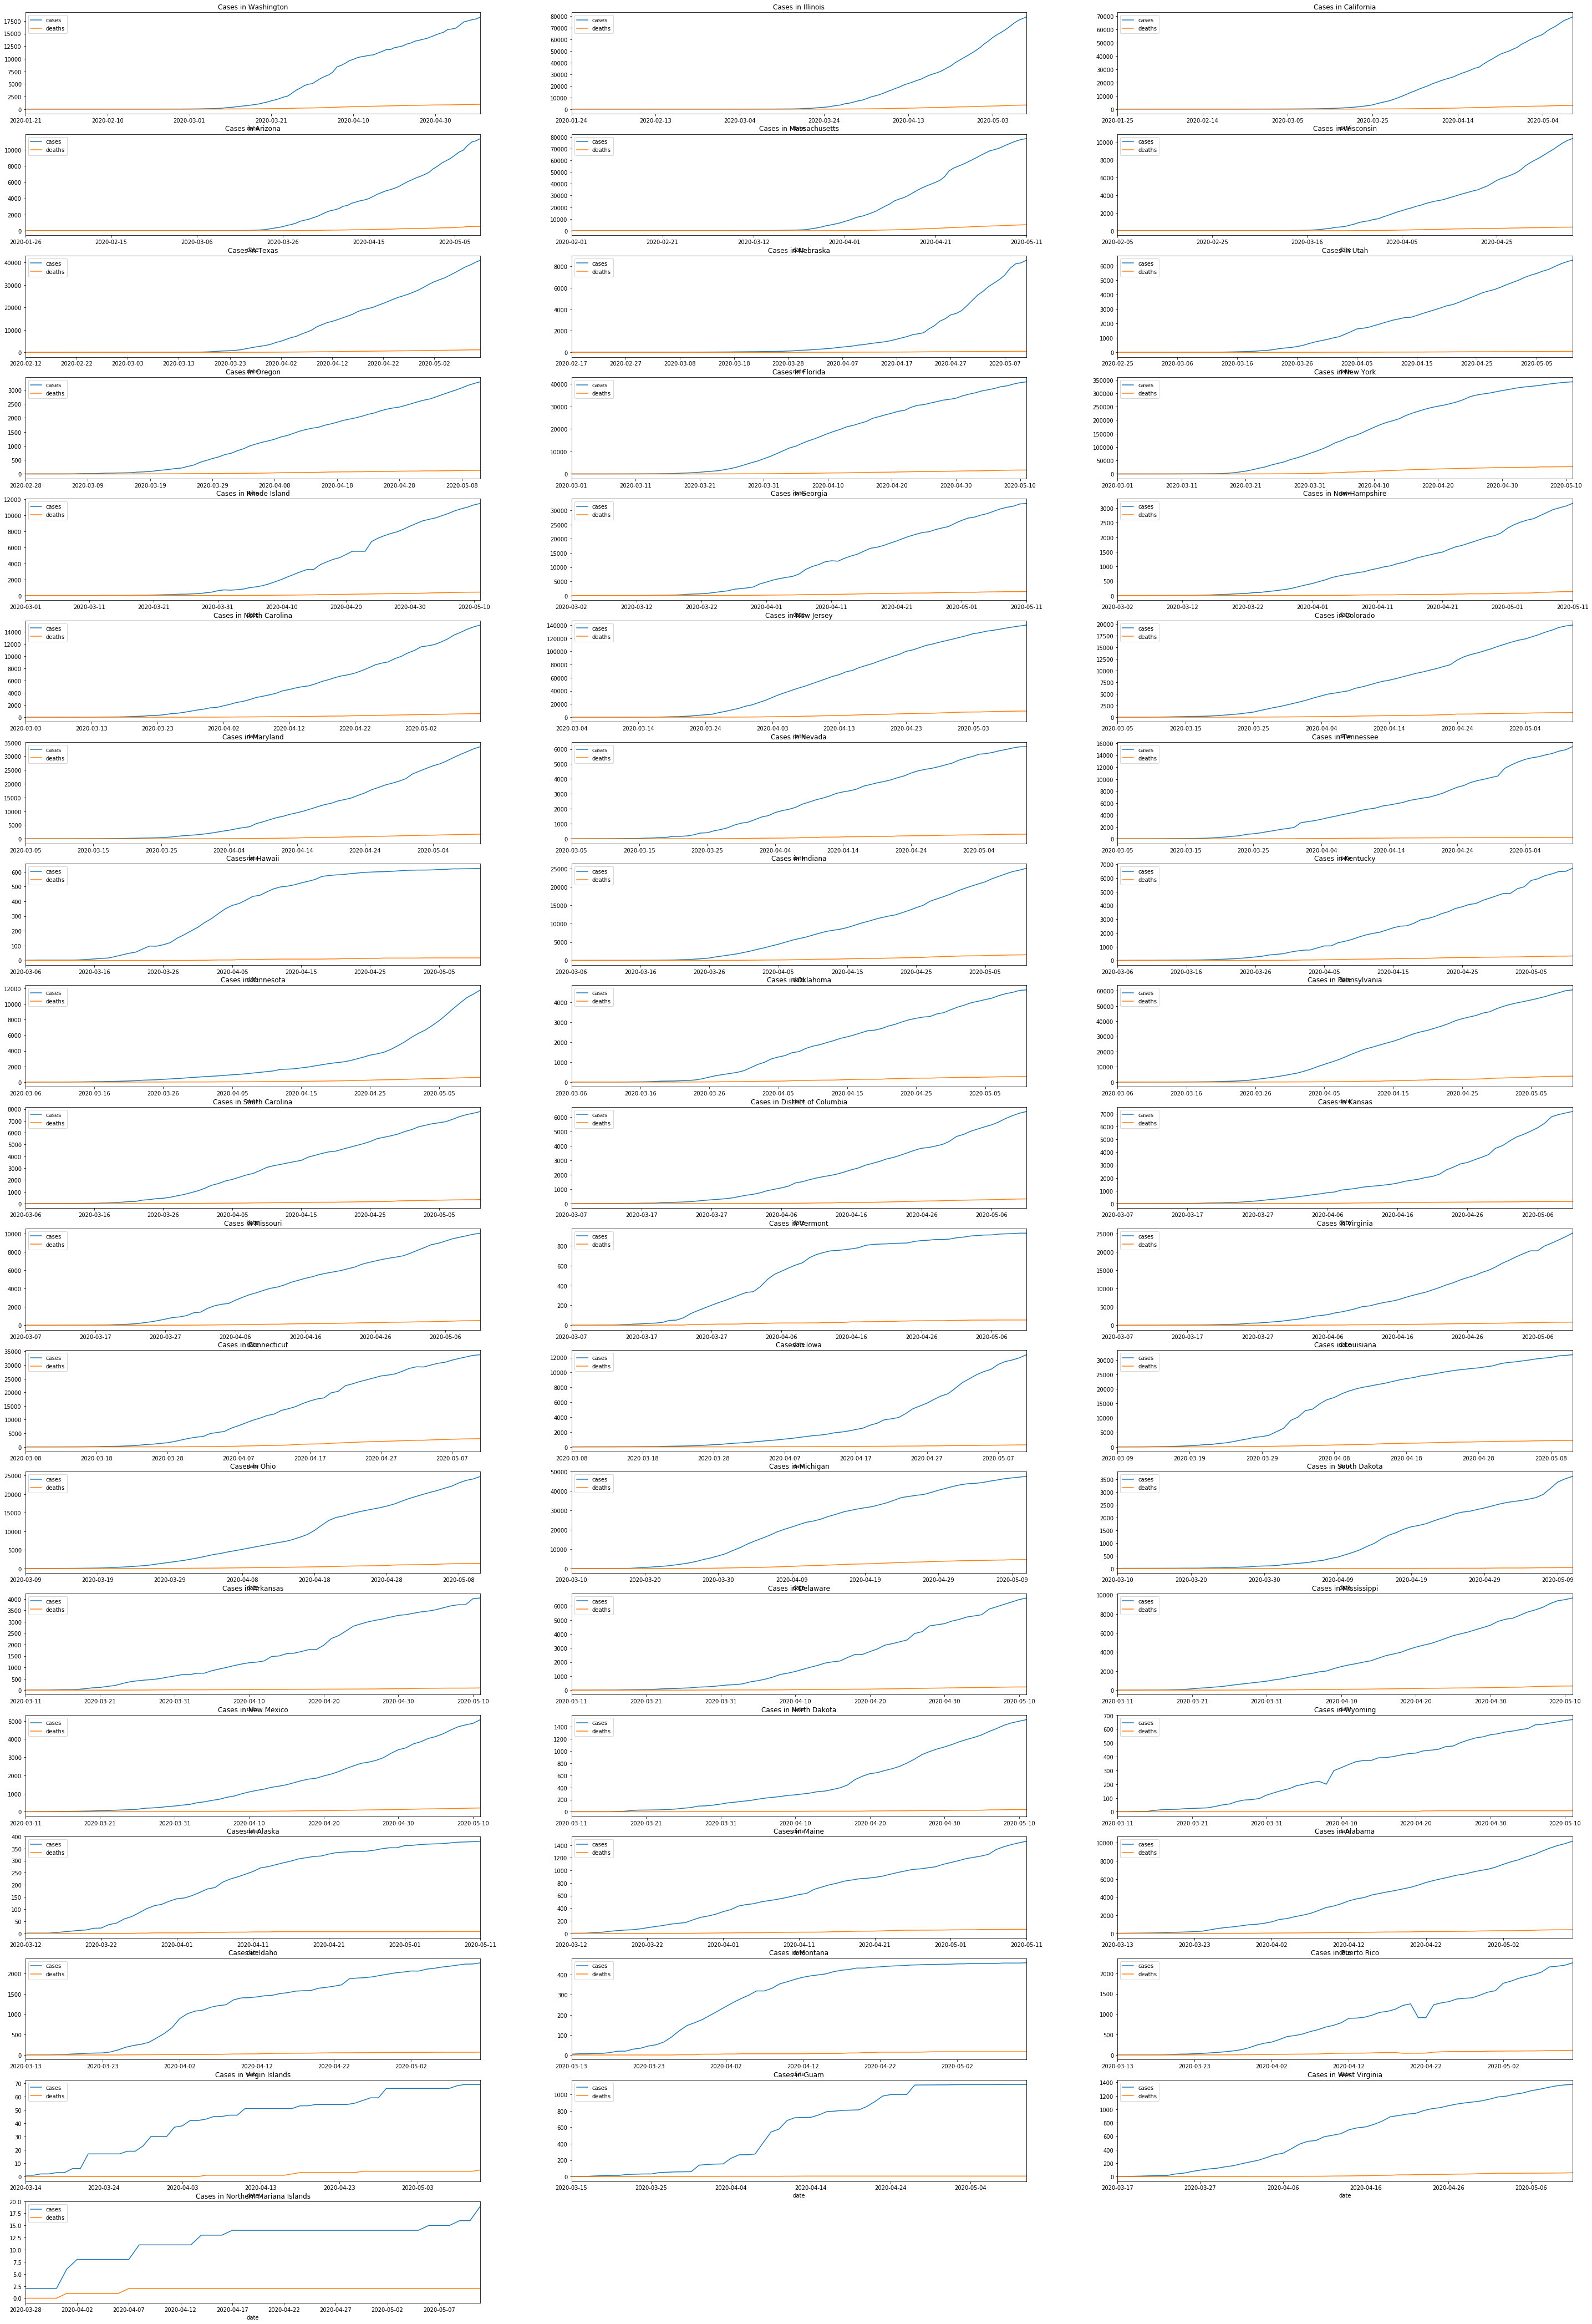

In [36]:
fig = plt.figure()

for i, state in enumerate(df.state.unique()):
    ax = fig.add_subplot(20,3,i+1)
    df[df['state']==state][['cases','deaths']].groupby(by='date').sum().plot(figsize=(50,80), ax=ax)
    plt.title('Cases in '+state)


### Clean the data 

Let's just dig into California

In [431]:
california = df[df['state']=='California']

In [432]:
california.head(3)

,county,state,fips,cases,deaths
date,,,,,
2020-01-25,Orange,California,6059.0,1,0
2020-01-26,Los Angeles,California,6037.0,1,0
2020-01-26,Orange,California,6059.0,1,0


In [433]:
agg = california.groupby(by='county').max().drop('fips', axis=1).sort_values(by='cases', ascending=False)
agg.head()

,state,cases,deaths
county,,,
Los Angeles,California,32258,1569
Riverside,California,5189,217
San Diego,California,5128,194
Orange,California,3627,76
San Bernardino,California,3015,121


#### Adding a new column to the dataset

In [435]:
agg['cases_per_death'] = agg['cases']/agg['deaths']

## 4) Answer the questions

When is it safe to open in California? Digging into the data, the first step would be to check the number of cases and death in each county. In order to make the analysis relevant, we will just dig into the top 10 in terms of cases and death in California.

First step is to create a barplot or barchart that will sort the counties in California based on their number of cases. We can also normalize these values based on the square footage. Each county has a different square footage and if the surface of the county is bigger, the number of cases will be as well. Comparing apples to apples here.

Let's start with absolute number first before normalizing them based on the size of the county.

In [436]:
import seaborn as sns 

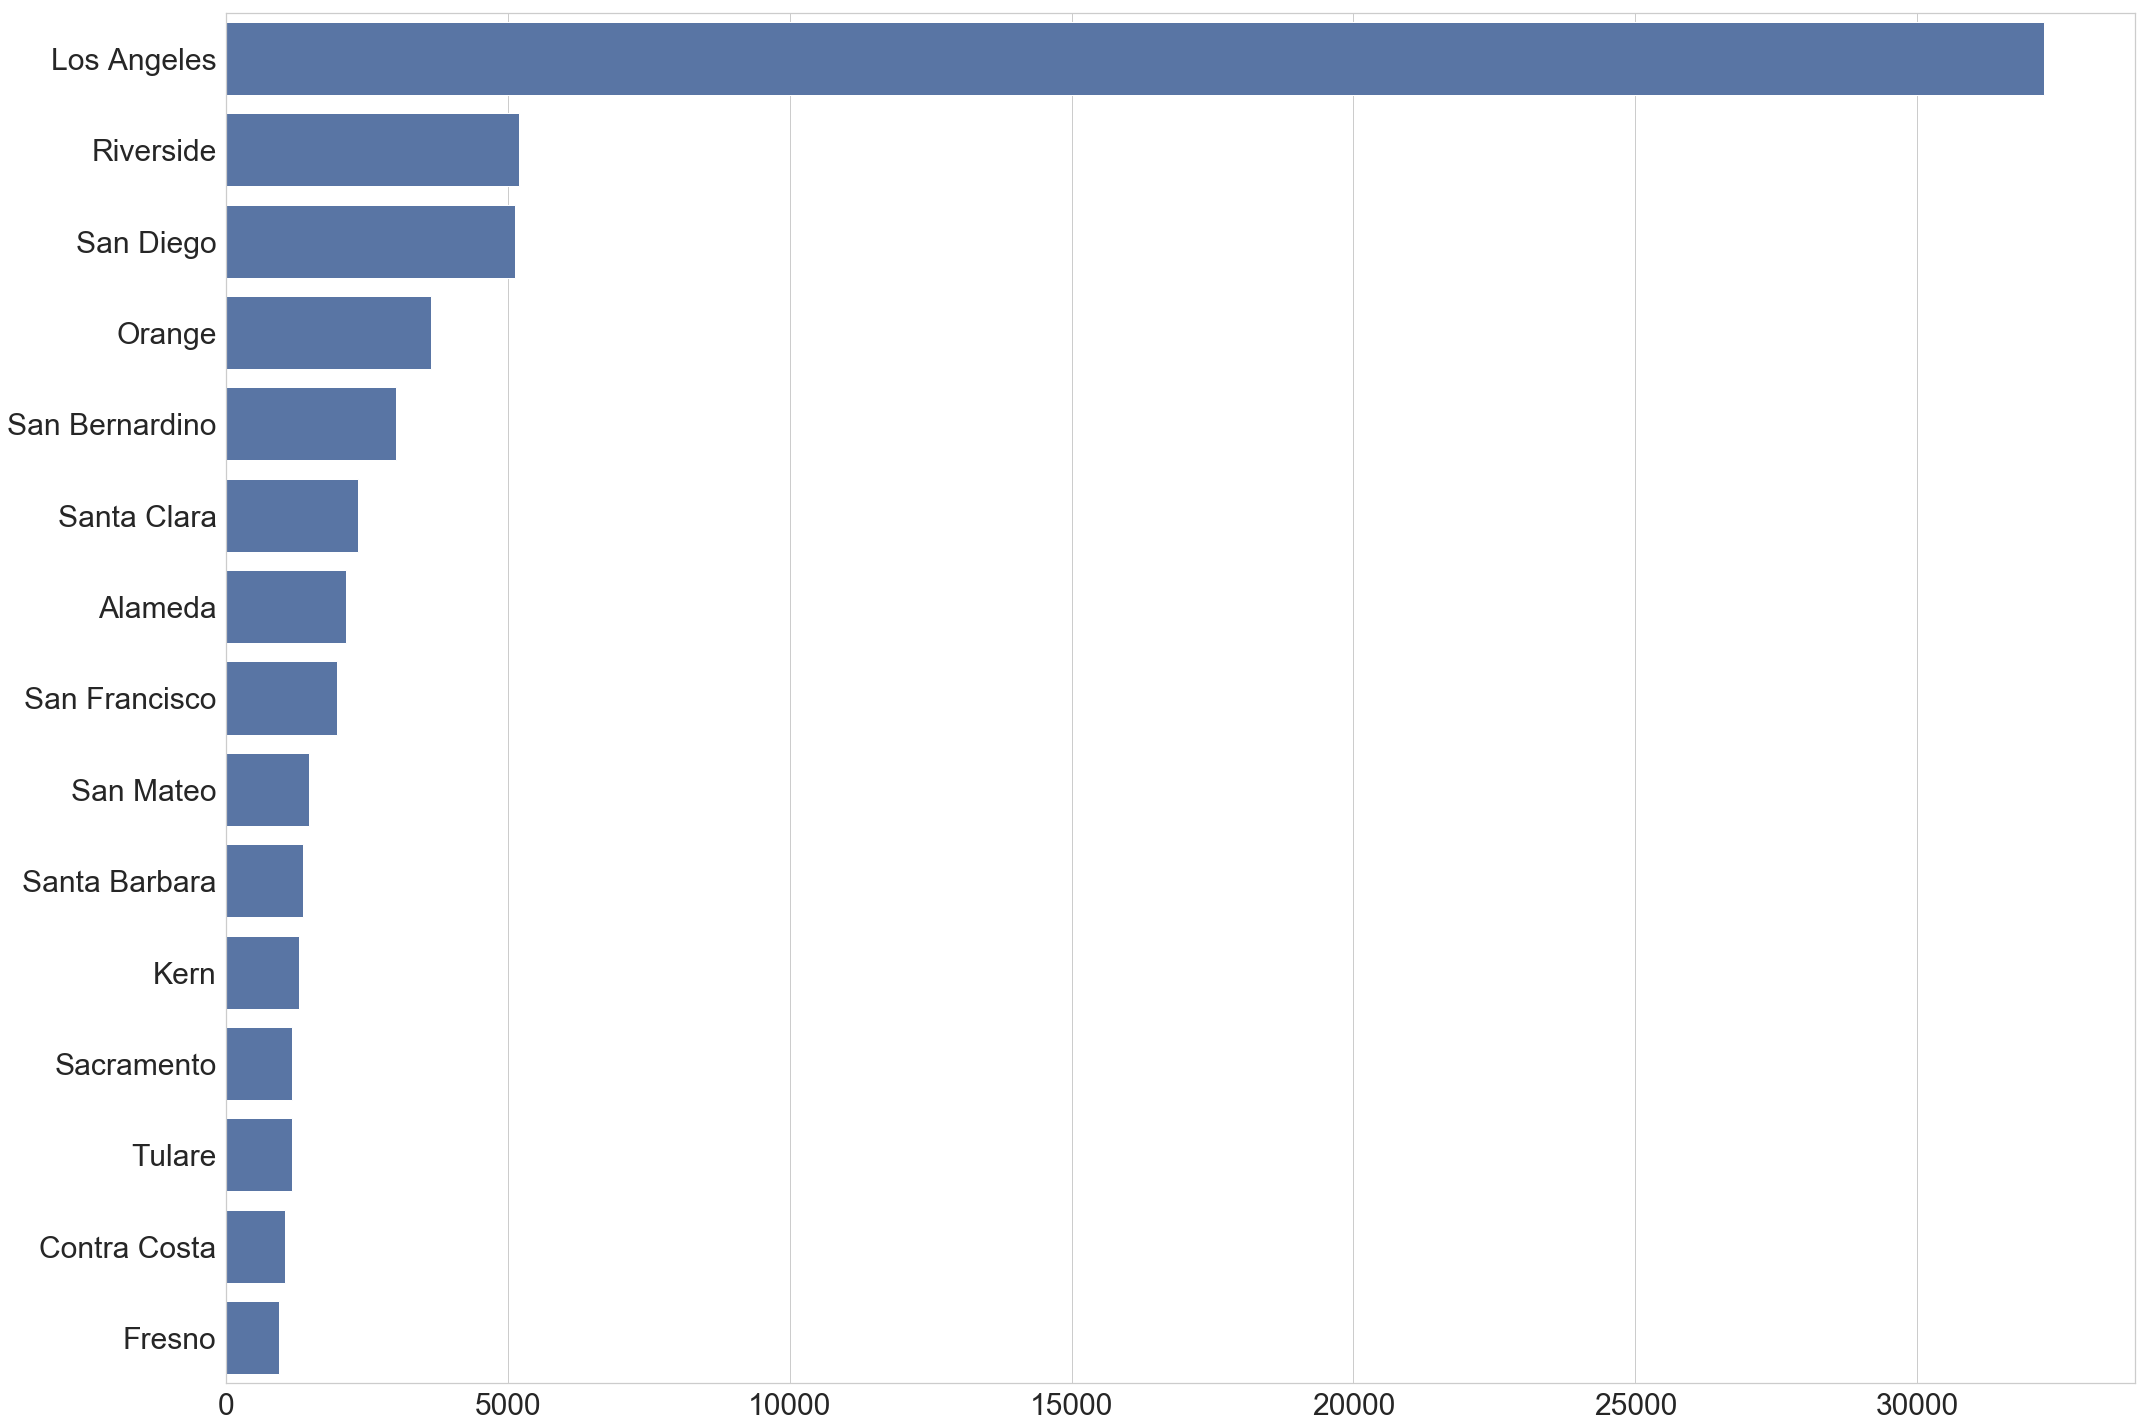

In [437]:
sns.set(style="whitegrid")

plt.figure(figsize=(30,20))
b = sns.barplot(y=agg.iloc[:15].index, x= agg.iloc[:15]['cases'], color='b',)
plt.xticks(size = 30)
plt.yticks(size = 30)

plt.ylabel('')
plt.xlabel('')

plt.tight_layout()

In [438]:
california.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-25,Orange,California,6059.0,1,0
2020-01-26,Los Angeles,California,6037.0,1,0
2020-01-26,Orange,California,6059.0,1,0
2020-01-27,Los Angeles,California,6037.0,1,0
2020-01-27,Orange,California,6059.0,1,0


In [439]:
test = california

test['lagged_cases'] = test.groupby('county')['cases'].shift(1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [440]:
test['lagged_cases'] = test['lagged_cases'].fillna(0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [441]:
test['lagged_cases']=test['cases'] - test['lagged_cases']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [442]:
test[test['county']=='Los Angeles'].head(4)

,county,state,fips,cases,deaths,lagged_cases
date,,,,,,
2020-01-26,Los Angeles,California,6037.0,1,0,1.0
2020-01-27,Los Angeles,California,6037.0,1,0,0.0
2020-01-28,Los Angeles,California,6037.0,1,0,0.0
2020-01-29,Los Angeles,California,6037.0,1,0,0.0


In [443]:
test.rename(columns={"lagged_cases": "new_cases"}, inplace =True)


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [444]:
test.head(3)

,county,state,fips,cases,deaths,new_cases
date,,,,,,
2020-01-25,Orange,California,6059.0,1,0,1.0
2020-01-26,Los Angeles,California,6037.0,1,0,1.0
2020-01-26,Orange,California,6059.0,1,0,0.0


In [445]:
la = california[california['county']=='Sacramento']

In [446]:
la.head(3)

,county,state,fips,cases,deaths,new_cases
date,,,,,,
2020-02-21,Sacramento,California,6067.0,1,0,1.0
2020-02-22,Sacramento,California,6067.0,1,0,0.0
2020-02-23,Sacramento,California,6067.0,1,0,0.0


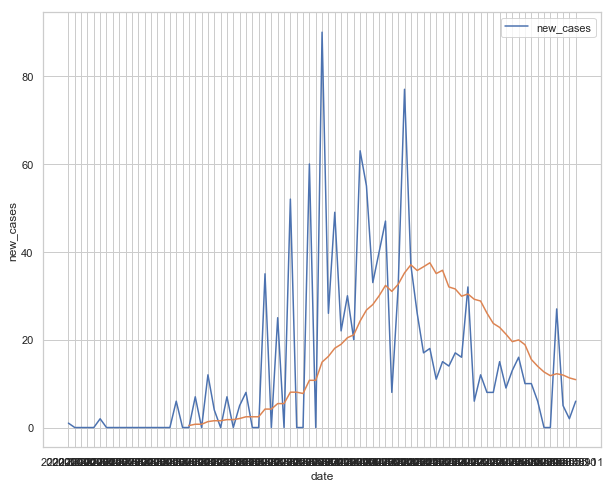

In [447]:
plt.figure(figsize=(10,8))
plt.plot(la.index ,la['new_cases'])
sns.lineplot(x=la.index, y=la['new_cases'].rolling(window=20).mean())

In [448]:
new_df = test

Let's start over again with a plan. Barplot by Counties and cases per deaths since it all started

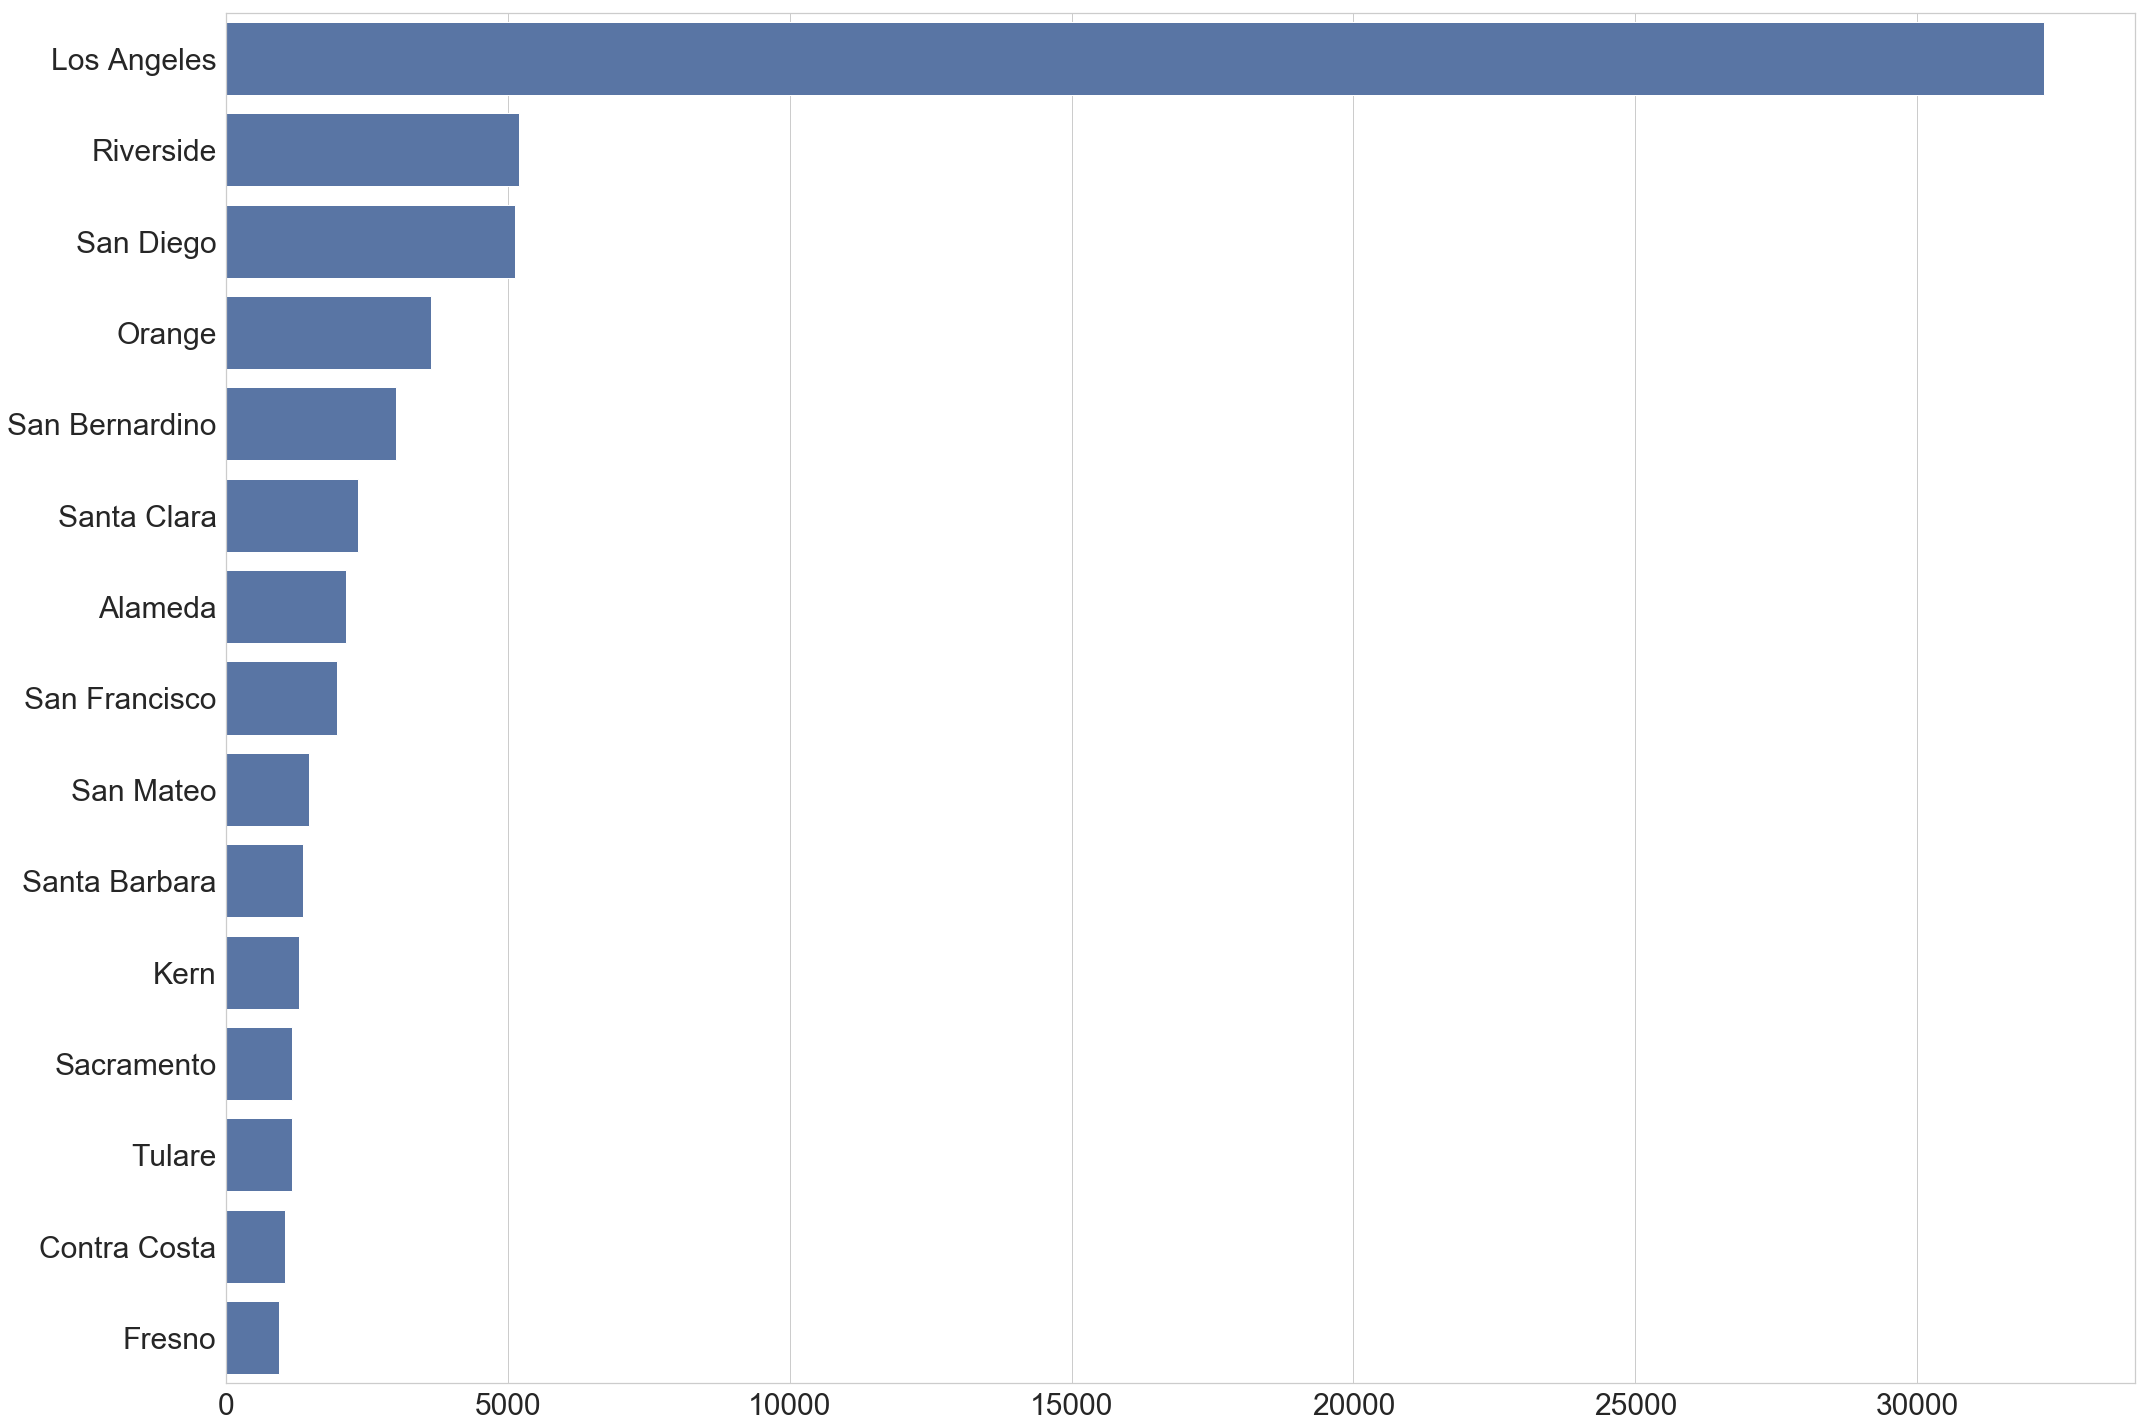

In [449]:
sns.set(style="whitegrid")

plt.figure(figsize=(30,20))
b = sns.barplot(y=agg.iloc[:15].index, x= agg.iloc[:15]['cases'], color='b',)
plt.xticks(size = 30)
plt.yticks(size = 30)

plt.ylabel('')
plt.xlabel('')

plt.tight_layout()

In [450]:
california[california['county']=='San Francisco'].tail(1)

,county,state,fips,cases,deaths,new_cases
date,,,,,,
2020-05-11,San Francisco,California,6075.0,1957,35,11.0


Los Angeles has the highest number of cases in California, with 32,258 cases as of 11th of May. It's followed by Riverside and San Diego. San Francisco is at the 8th position with only 1957 cases.

While these numbers seem high for some counties (Los Angeles), we might want to normalize at based on the population. If you were to live in a place with only 2 people in it and you have the COVID-19 (let's call this place Iceland), it's only 1 case but that represents 50% of the whole population.

Let's dig into what percentage of the population is infected for each county. 

In [451]:
#The data here was imported from Census 2020. In case anyone wants to change the data (to correct population numbers)
#I'll create a dictionary for that

population = {
        'Los Angeles': 10105518,
        'Riverside': 2450758,
        'San Diego': 3343364,
        'Orange': 3185968,
        'San Bernardino': 2171603,
        'Santa Clara': 1937570,
        'Alameda': 1666753,
        'San Francisco': 883305,
        'San Mateo': 769545,
        'Santa Barbara': 446527,
        'Kern': 896764,
        'Sacramento': 1540975,
        'Tulare': 465861,
        'Contra Costa': 1150215,
        'Fresno': 994400
}

In [452]:
population_bis = {'counties': list(population.keys()), 'population': list(population.values())}
population_df = pd.DataFrame(population_bis).set_index('counties')

In [453]:
top_15 = agg.iloc[:15]
top_15 = pd.concat([top_15, population_df], axis=1)
top_15.drop('state', axis=1)

,cases,deaths,cases_per_death,population
Los Angeles,32258,1569,20.559592,10105518
Riverside,5189,217,23.912442,2450758
San Diego,5128,194,26.432990,3343364
Orange,3627,76,47.723684,3185968
San Bernardino,3015,121,24.917355,2171603
Santa Clara,2341,131,17.870229,1937570
Alameda,2122,75,28.293333,1666753
San Francisco,1957,35,55.914286,883305
San Mateo,1464,65,22.523077,769545
Santa Barbara,1362,11,123.818182,446527


In [463]:
top_15['pct_infected'] = top_15['cases']/top_15['population']
top_15

,state,cases,deaths,cases_per_death,population,pct_infected
Los Angeles,California,32258,1569,20.559592,10105518,0.003192
Riverside,California,5189,217,23.912442,2450758,0.002117
San Diego,California,5128,194,26.432990,3343364,0.001534
Orange,California,3627,76,47.723684,3185968,0.001138
San Bernardino,California,3015,121,24.917355,2171603,0.001388
Santa Clara,California,2341,131,17.870229,1937570,0.001208
Alameda,California,2122,75,28.293333,1666753,0.001273
San Francisco,California,1957,35,55.914286,883305,0.002216
San Mateo,California,1464,65,22.523077,769545,0.001902
Santa Barbara,California,1362,11,123.818182,446527,0.003050


## 5) Visualize

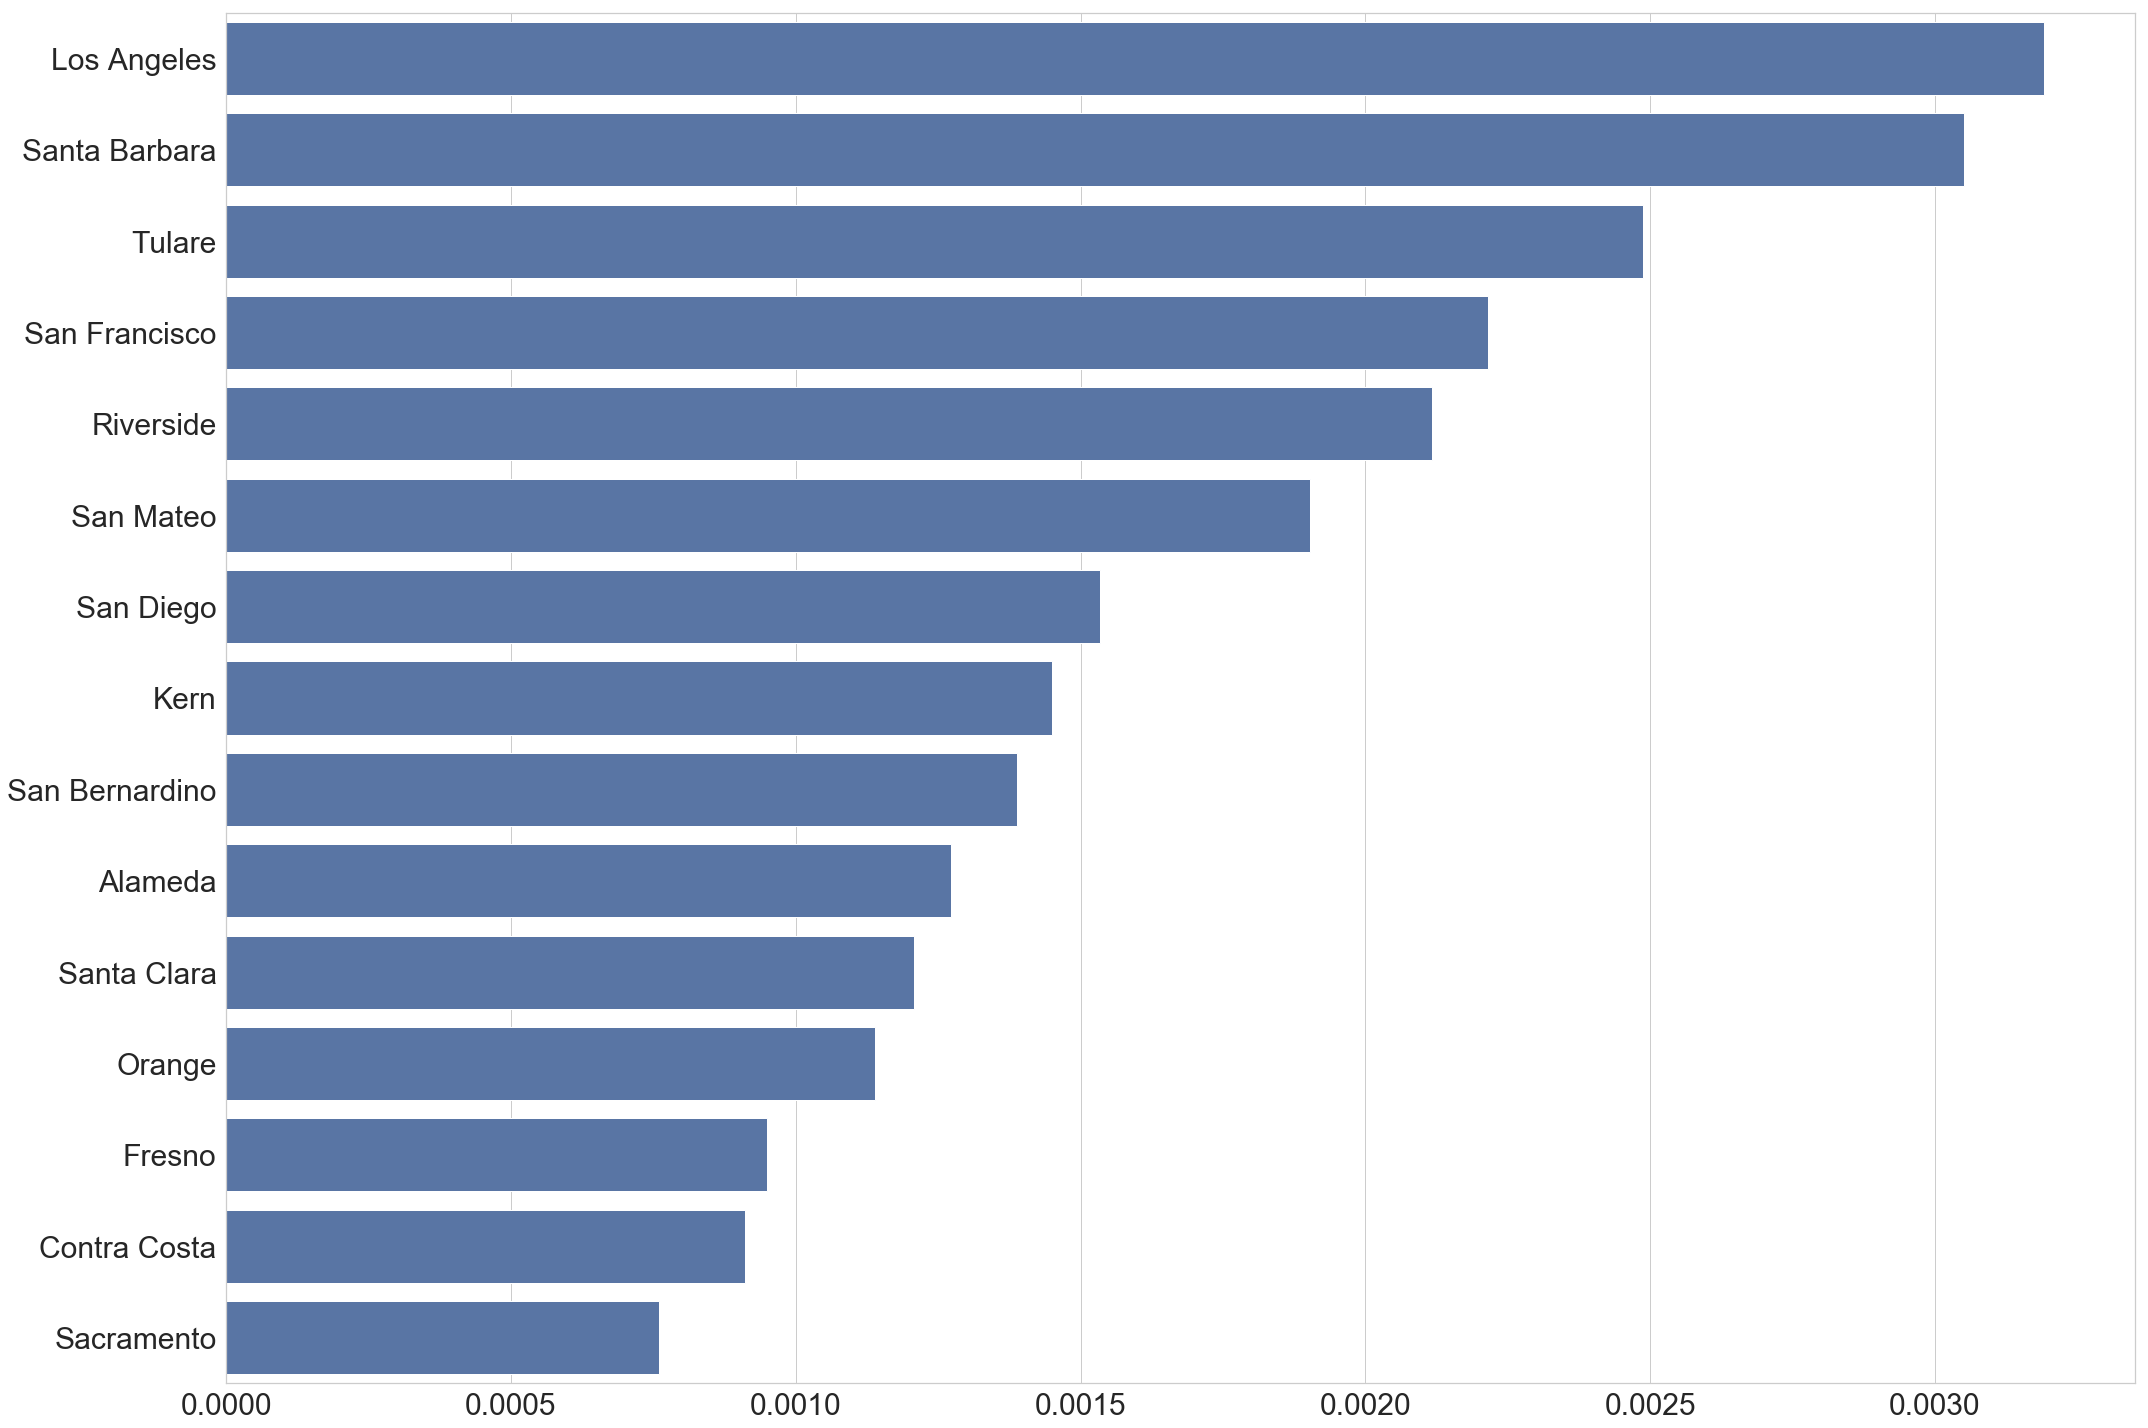

In [455]:
sns.set(style="whitegrid")

plt.figure(figsize=(30,20))
b = sns.barplot(y='index', x= 'pct_infected', data=top_15.reset_index().sort_values(by='pct_infected',
                                                                                   ascending=False)
                                                                                                 , color='b',)
plt.xticks(size = 30)
plt.yticks(size = 30)

plt.ylabel('')
plt.xlabel('')

plt.tight_layout()

In [456]:
top_15.reset_index().sort_values(by='pct_infected')

,index,state,cases,deaths,cases_per_death,population,pct_infected
11,Sacramento,California,1172,52,22.538462,1540975,0.000761
13,Contra Costa,California,1048,32,32.750000,1150215,0.000911
14,Fresno,California,945,9,105.000000,994400,0.000950
3,Orange,California,3627,76,47.723684,3185968,0.001138
5,Santa Clara,California,2341,131,17.870229,1937570,0.001208
6,Alameda,California,2122,75,28.293333,1666753,0.001273
4,San Bernardino,California,3015,121,24.917355,2171603,0.001388
10,Kern,California,1300,16,81.250000,896764,0.001450
2,San Diego,California,5128,194,26.432990,3343364,0.001534
8,San Mateo,California,1464,65,22.523077,769545,0.001902


Los Angeles with the highest number of case has also the highest percentage of infection with 0.3% of its population. San Francisco is now ranked 4th with a percentage infection of 0.22%. 

Text(0, 0.5, '')

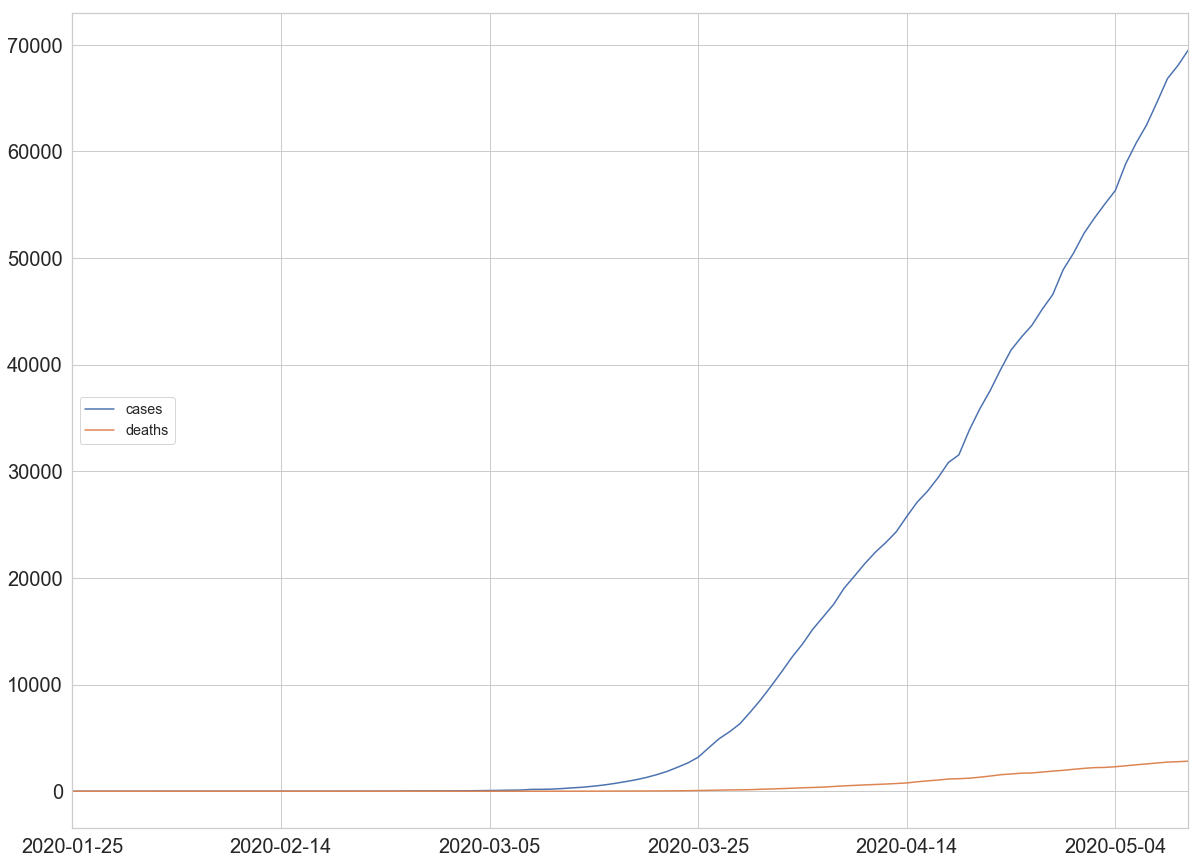

In [457]:
plt.figure(figsize=(20,15))
california.groupby('date').sum()['cases'].plot(label='cases')
california.groupby('date').sum()['deaths'].plot(label='deaths')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize='large', loc='center left')
plt.xlabel('')
plt.ylabel('')

In [458]:
california.groupby('date').sum().tail(1)

,fips,cases,deaths,new_cases
date,,,,
2020-05-11,333189.0,69513,2820,1462.0


In [459]:
top_15

,state,cases,deaths,cases_per_death,population,pct_infected
Los Angeles,California,32258,1569,20.559592,10105518,0.003192
Riverside,California,5189,217,23.912442,2450758,0.002117
San Diego,California,5128,194,26.432990,3343364,0.001534
Orange,California,3627,76,47.723684,3185968,0.001138
San Bernardino,California,3015,121,24.917355,2171603,0.001388
Santa Clara,California,2341,131,17.870229,1937570,0.001208
Alameda,California,2122,75,28.293333,1666753,0.001273
San Francisco,California,1957,35,55.914286,883305,0.002216
San Mateo,California,1464,65,22.523077,769545,0.001902
Santa Barbara,California,1362,11,123.818182,446527,0.003050


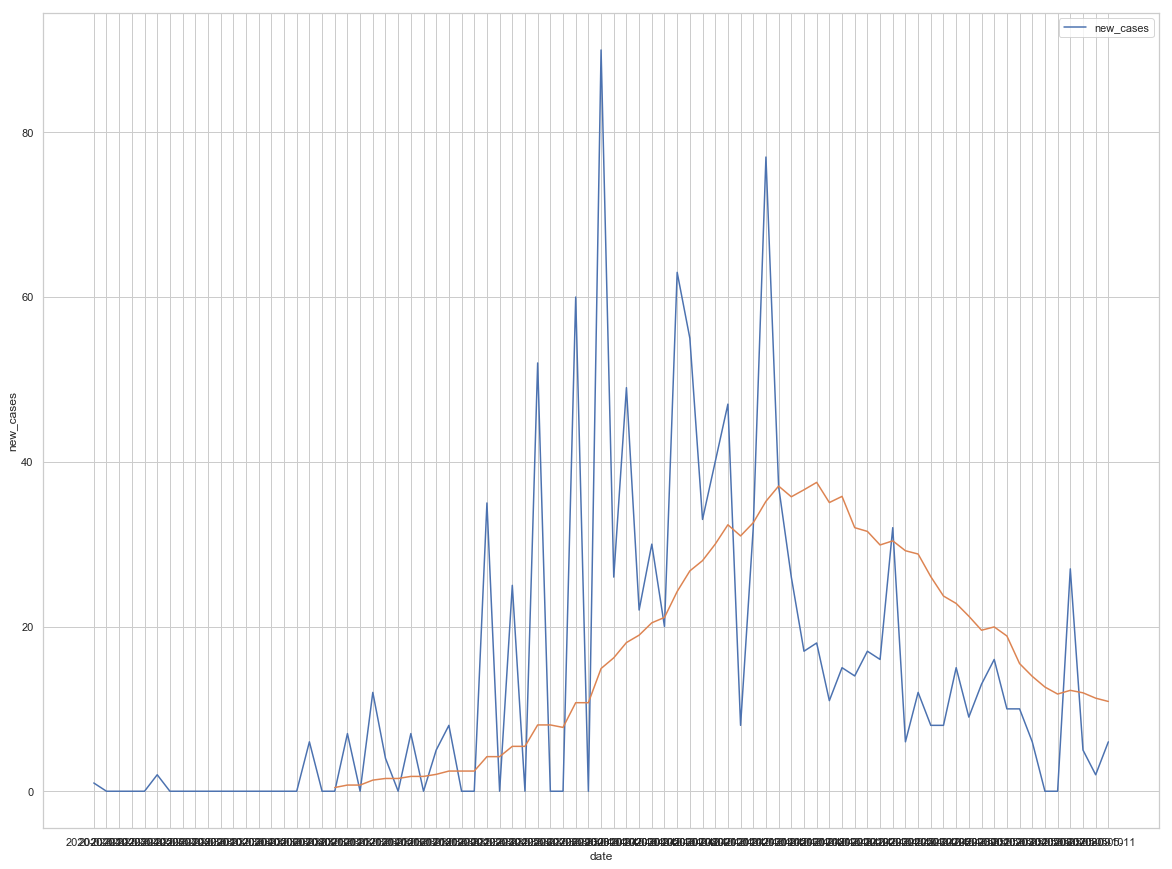

In [460]:
la = california[california['county']=='Sacramento']

plt.figure(figsize=(20,15))
plt.plot(la.index ,la['new_cases'])
sns.lineplot(x=la.index, y=la['new_cases'].rolling(window=20).mean())

In [461]:
temp['ma_new_case'] = temp.groupby('county')['new_cases'].transform(lambda x: x.rolling(7).mean())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


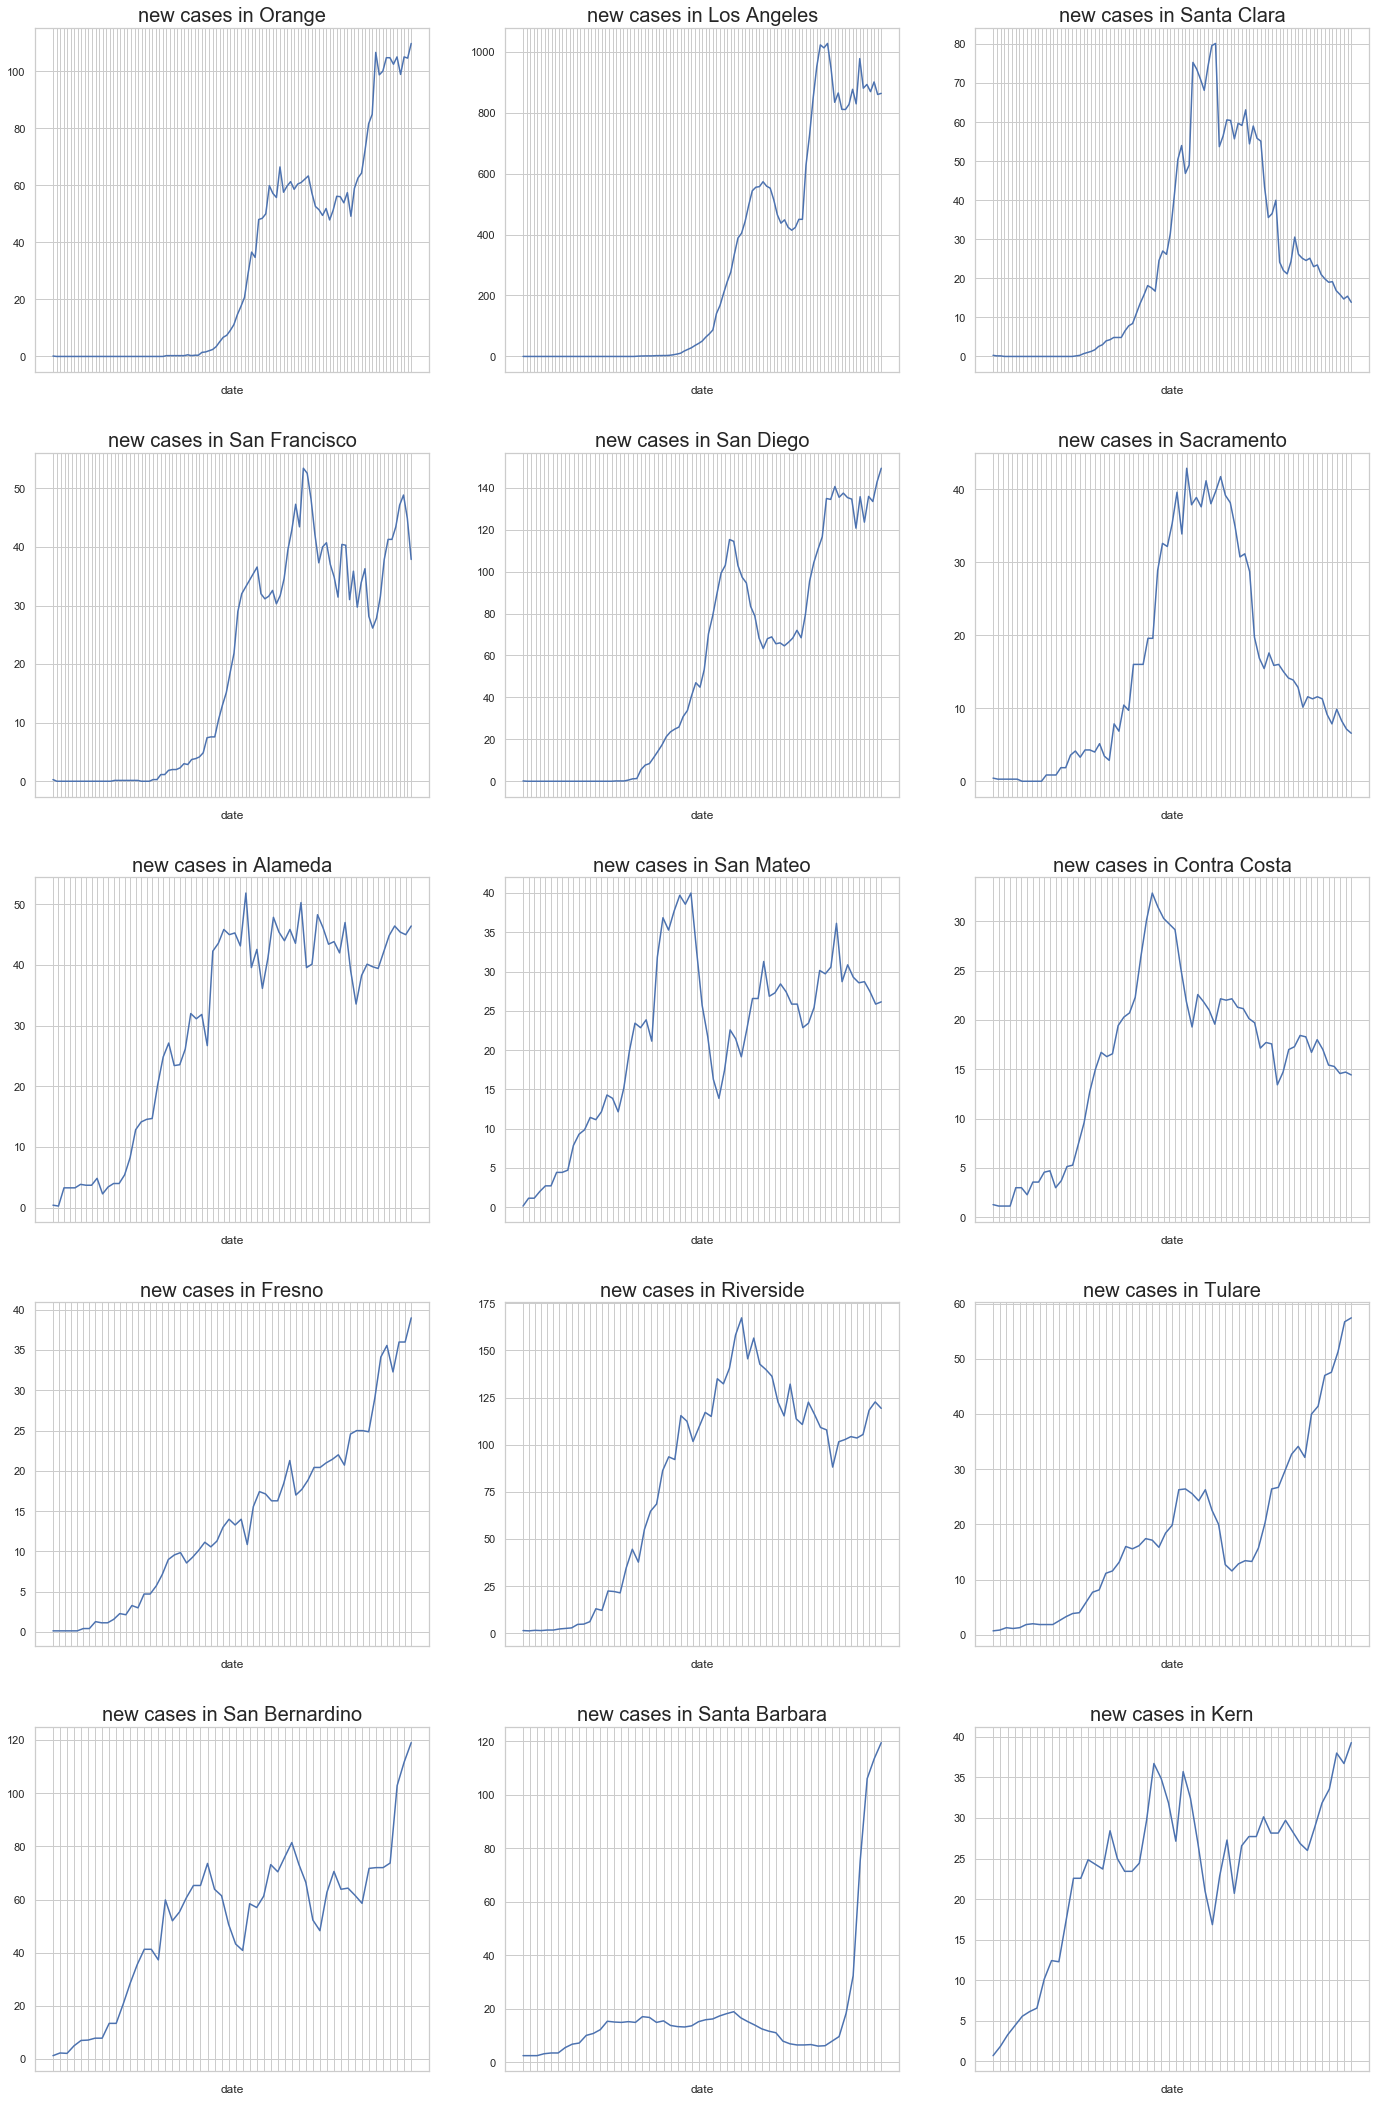

In [462]:
fig1 = plt.figure(figsize=(20,30))


for i,county in enumerate(temp.county.unique()):
    ax1 = fig1.add_subplot(5,3,i+1)
#     sns.lineplot(x='date', y= 'new_cases', data= temp[temp['county']== county].reset_index(), ax=ax1)
    sns.lineplot(x='date', y= 'ma_new_case', data= temp[temp['county']== county].reset_index(), ax=ax1)
    ax1.set_xticklabels([])
    plt.ylabel('')
    
    plt.title('new cases in '+county, fontdict = {'fontsize' : 20})
    plt.tight_layout(pad=3)

## 6) Modeling

No application of modeling for this case